In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix #Evaluation of model
from sklearn.datasets import load_diabetes
from sklearn.metrics import roc_curve,roc_auc_score

In [3]:
load_diabetes

<function sklearn.datasets.base.load_diabetes(return_X_y=False)>

In [4]:
df = load_diabetes()

In [7]:
df.data #array of all data will be displayed

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [9]:
diabetes= pd.DataFrame(df.data)

In [11]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [12]:
diabetes.columns=df.feature_names

In [13]:
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [14]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [15]:
df.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [16]:
dia=pd.read_csv("diabetes.csv")

In [17]:
dia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


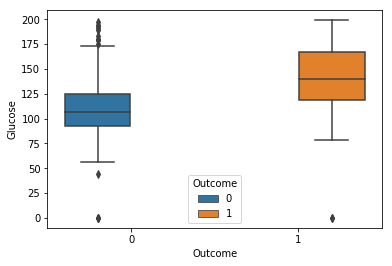

In [22]:
sns.boxplot('Outcome','Glucose',data=dia,hue = 'Outcome')
plt.show()
#Higher level of glucose results in high level of diabetes

In [32]:
np.mean(dia.Glucose)

120.89453125

In [33]:
dia.loc[dia["Outcome"]==0,"Glucose"].describe()

count    500.0000
mean     109.9800
std       26.1412
min        0.0000
25%       93.0000
50%      107.0000
75%      125.0000
max      197.0000
Name: Glucose, dtype: float64

In [34]:
dia.loc[dia["Outcome"]==1,"Glucose"].describe()

count    268.000000
mean     141.257463
std       31.939622
min        0.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64

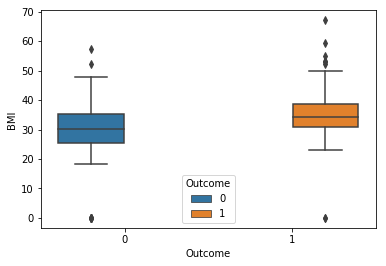

In [35]:
sns.boxplot('Outcome','BMI',data=dia,hue = 'Outcome')
plt.show()

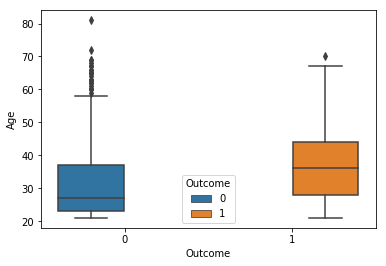

In [38]:
sns.boxplot('Outcome','Age',data=dia,hue = 'Outcome')
plt.show()

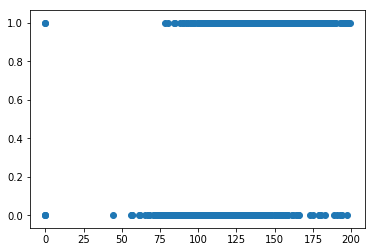

In [40]:
plt.scatter(dia['Glucose'],dia['Outcome'])

In [42]:
x=dia.drop("Outcome",axis=1)
y=dia.Outcome
lg=LogisticRegression()
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [45]:
lg.fit(xtrain,ytrain)


C:\Users\Sebastian john\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
pred_dia=lg.predict(xtest)

In [47]:
pred_dia

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [56]:
prob=lg.predict_proba(xtest)
prob

array([[0.10454348, 0.89545652],
       [0.78657722, 0.21342278],
       [0.85903762, 0.14096238],
       [0.39700156, 0.60299844],
       [0.82780622, 0.17219378],
       [0.92380813, 0.07619187],
       [0.31009664, 0.68990336],
       [0.25112061, 0.74887939],
       [0.55752904, 0.44247096],
       [0.62417548, 0.37582452],
       [0.44321136, 0.55678864],
       [0.10177211, 0.89822789],
       [0.69768947, 0.30231053],
       [0.75107644, 0.24892356],
       [0.82684424, 0.17315576],
       [0.79394002, 0.20605998],
       [0.19423303, 0.80576697],
       [0.93174898, 0.06825102],
       [0.60774226, 0.39225774],
       [0.68247219, 0.31752781],
       [0.43263034, 0.56736966],
       [0.6413393 , 0.3586607 ],
       [0.64302997, 0.35697003],
       [0.90513945, 0.09486055],
       [0.89512635, 0.10487365],
       [0.62157216, 0.37842784],
       [0.91402293, 0.08597707],
       [0.1653367 , 0.8346633 ],
       [0.82475216, 0.17524784],
       [0.79998037, 0.20001963],
       [0.

In [48]:
accuracy_score(ytest,pred_dia)

0.8072916666666666

In [49]:
round(accuracy_score(ytest,pred_dia),3)*100

80.7

In [51]:
cf=confusion_matrix(ytest,pred_dia)

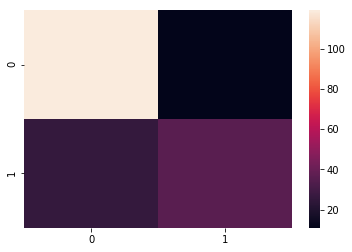

In [52]:
sns.heatmap(data=cf)

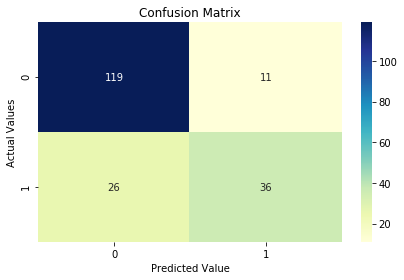

In [55]:
ax=sns.heatmap(data=cf,cmap='YlGnBu',annot=True,fmt='2g')
ax.set(xlabel="Predicted Value",ylabel="Actual Values",title="Confusion Matrix")
plt.tight_layout()

In [57]:
from sklearn.metrics import precision_score, recall_score

In [63]:
round(accuracy_score(ytest,pred_dia),3)*100 #Accuracy is the correctness of the particular data compared bw actual and predicted

80.7

In [59]:
precision_score(ytest,pred_dia) #Generalised accuracy score

0.7659574468085106

In [61]:
recall_score(ytest,pred_dia)*100 #is number of times that the machine will be precise

58.06451612903226

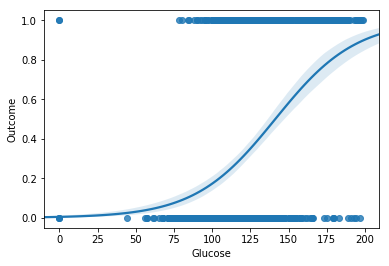

In [66]:
sns.regplot(x="Glucose",y="Outcome",data=dia,logistic=True)
plt.show()

In [68]:
def sigmoid_plot(x,title):
    sns.regplot(x="Glucose",y="Outcome",data=dia,logistic=True)

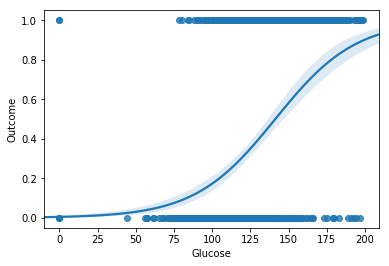

In [69]:
sigmoid_plot("BMI","BMI_Plot")

In [72]:
probability=lg.predict_proba(xtest)[::,1]
probability

array([0.89545652, 0.21342278, 0.14096238, 0.60299844, 0.17219378,
       0.07619187, 0.68990336, 0.74887939, 0.44247096, 0.37582452,
       0.55678864, 0.89822789, 0.30231053, 0.24892356, 0.17315576,
       0.20605998, 0.80576697, 0.06825102, 0.39225774, 0.31752781,
       0.56736966, 0.3586607 , 0.35697003, 0.09486055, 0.10487365,
       0.37842784, 0.08597707, 0.8346633 , 0.17524784, 0.20001963,
       0.47322612, 0.28456741, 0.13227091, 0.48373439, 0.17639175,
       0.64070469, 0.47378503, 0.13073891, 0.39691619, 0.68499661,
       0.31041805, 0.21887753, 0.23550138, 0.75023822, 0.72338336,
       0.03391282, 0.15529925, 0.27923145, 0.39221081, 0.30328644,
       0.43027277, 0.26067066, 0.82048667, 0.45866355, 0.18596399,
       0.01272256, 0.1107114 , 0.40934645, 0.30276726, 0.24038193,
       0.6321794 , 0.47472345, 0.16059434, 0.7146661 , 0.61124625,
       0.8372052 , 0.62331976, 0.18638965, 0.39967092, 0.1607023 ,
       0.17464241, 0.53125821, 0.14182891, 0.86168212, 0.73947

In [78]:
from sklearn.metrics import roc_curve,roc_auc_score

In [75]:
fpr,tpr,_ =roc_curve(ytest,probability)

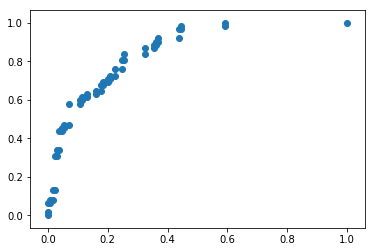

In [76]:
plt.scatter(fpr,tpr)

In [79]:
auc=roc_auc_score(ytest,probability)

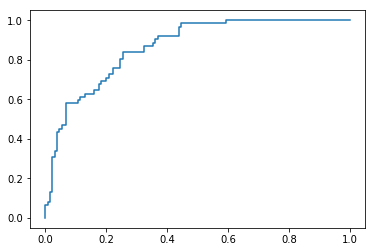

In [80]:
plt.plot(fpr,tpr)

In [81]:
auc

0.8641439205955335

In [82]:
import scikitplot as skplt

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
sns.swarmplot(x='Survived',y='Fare',hue="Pclass",data=train)